In [1]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Dense, GRU

from keras.datasets import imdb
from keras.preprocessing import sequence

import matplotlib.pyplot as plt

/usr/lib64/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
max_features = 15000  # 특성으로 사용할 단어의 수
maxlen = 2000  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
batch_size = 128

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 2000)
input_test 크기: (25000, 2000)


In [4]:
model = Sequential()
model.add(Embedding(max_features, batch_size))
model.add(LSTM(128, dropout=0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
  384/20000 [..............................] - ETA: 8:53 - loss: 0.6932 - acc: 0.5156

KeyboardInterrupt: 

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(18, 8))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(18, 8))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model = Sequential()
model.add(Embedding(max_features, batch_size))
# model.add(LSTM(32))
model.add(GRU(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2)

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(18, 8))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(18, 8))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [6]:
model = Sequential()
model.add(Embedding(max_features, batch_size))
# model.add(LSTM(32))
model.add(GRU(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=1000,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 252s 13ms/step - loss: 0.6117 - acc: 0.6576 - val_loss: 0.5158 - val_acc: 0.7472
Epoch 2/10
20000/20000 [==============================] - 245s 12ms/step - loss: 0.4384 - acc: 0.8028 - val_loss: 0.4370 - val_acc: 0.8056
Epoch 3/10
20000/20000 [==============================] - 248s 12ms/step - loss: 0.3490 - acc: 0.8577 - val_loss: 0.3942 - val_acc: 0.8320
Epoch 4/10
20000/20000 [==============================] - 247s 12ms/step - loss: 0.3233 - acc: 0.8670 - val_loss: 0.4255 - val_acc: 0.8166
Epoch 5/10
20000/20000 [==============================] - 254s 13ms/step - loss: 0.2801 - acc: 0.8884 - val_loss: 0.4438 - val_acc: 0.8100
Epoch 6/10
20000/20000 [==============================] - 247s 12ms/step - loss: 0.2554 - acc: 0.9014 - val_loss: 0.3773 - val_acc: 0.8400
Epoch 7/10
20000/20000 [==============================] - 244s 12ms/step - loss: 0.2336 - acc: 0.9111 - val_loss: 0.3

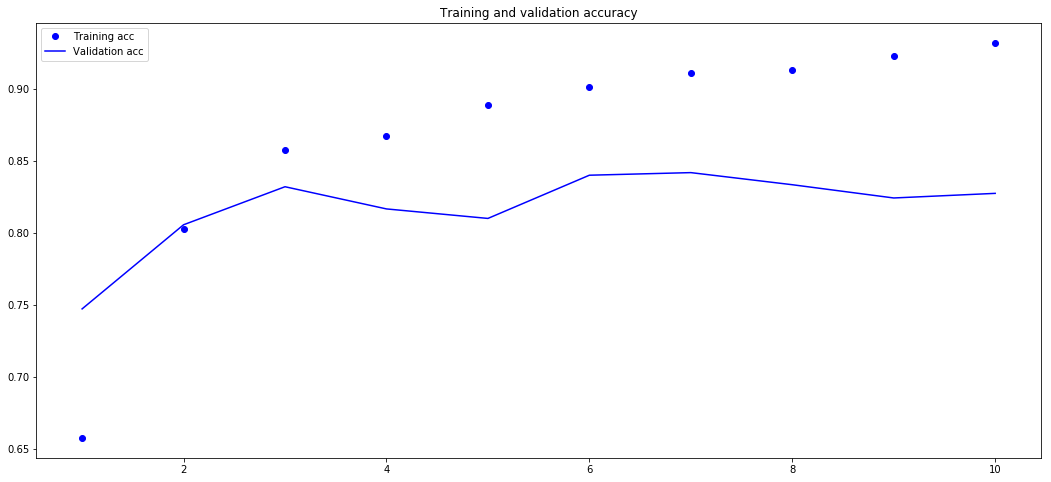

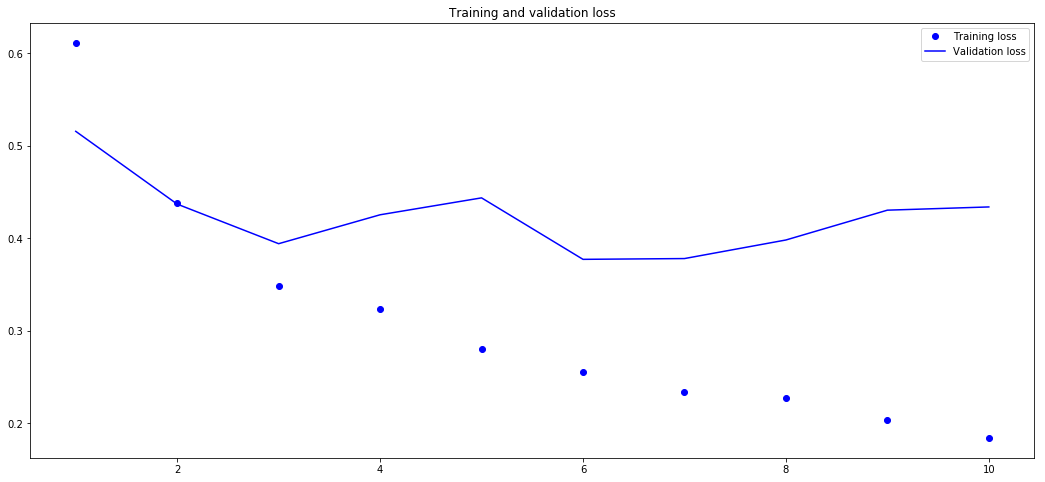

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(18, 8))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(18, 8))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()